In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import sys

In [2]:
sys.path.append('..')

In [3]:
data = pd.read_csv('2019.csv')
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


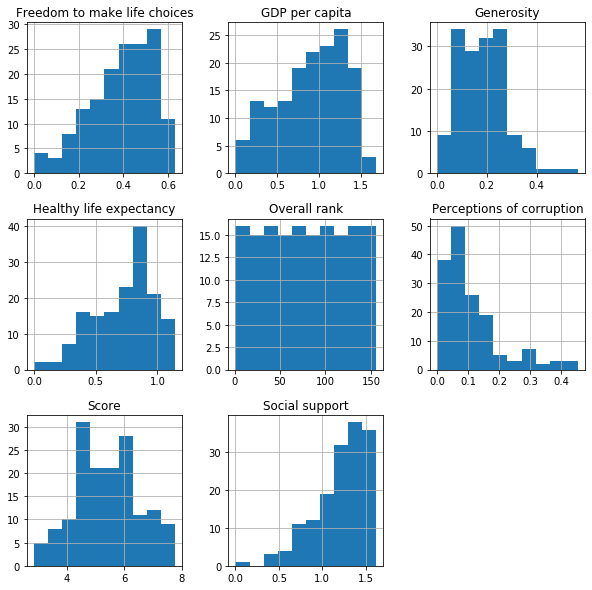

In [4]:
_ = data.hist(figsize=(10, 10))

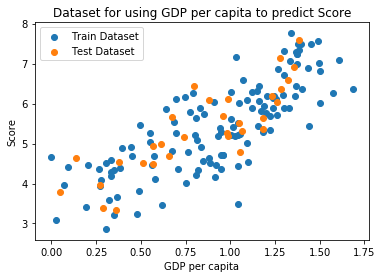

In [5]:
x_name = 'GDP per capita'
y_name = 'Score'
train_test_ratio = 0.8

data = data[[x_name, y_name]]
train_data = data.sample(frac=train_test_ratio)
test_data = data.drop(train_data.index)

train_x = train_data[x_name]
train_y = train_data[y_name]
test_x = test_data[x_name]
test_y = test_data[y_name]

plt.scatter(train_x, train_y, label='Train Dataset')
plt.scatter(test_x, test_y, label='Test Dataset')
plt.title(f'Dataset for using {x_name} to predict {y_name}')
plt.legend()
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

20 iteration: cost=7.455 t0=0.908 t1=0.892
40 iteration: cost=3.572 t0=1.526 t1=1.494
60 iteration: cost=1.787 t0=1.948 t1=1.899
80 iteration: cost=0.966 t0=2.237 t1=2.171
100 iteration: cost=0.589 t0=2.436 t1=2.353
120 iteration: cost=0.415 t0=2.574 t1=2.473
140 iteration: cost=0.335 t0=2.670 t1=2.552
160 iteration: cost=0.297 t0=2.737 t1=2.603
180 iteration: cost=0.280 t0=2.786 t1=2.635
200 iteration: cost=0.271 t0=2.821 t1=2.654


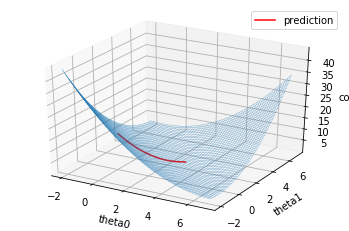

In [6]:
t0 = 0
t1 = 0
lr = 0.01
iters = 200
m = len(train_x)

x = np.linspace(-2, 7, 50)  # t0
y = np.linspace(-2, 7, 50)  # t1
x, y = np.meshgrid(x, y)

z = np.array(list(np.sum(np.square(x_ + y_ * train_x - train_y)) /2 /m for x_, y_ in zip(x.flatten(), y.flatten())))
z = z.reshape(x.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(x, y, z, linewidth=0.2, antialiased=True, cmap=cm.coolwarm)


t0s = []
t1s = []
costs = []

for i in range(1, iters+1):
    temp = t0 + t1 * train_x - train_y
    t0 -= lr * np.sum(temp) / m
    t1 -= lr * np.sum(temp * train_x) / m
    cost = np.square(temp).sum() / 2 / m
    t0s.append(t0)
    t1s.append(t1)
    costs.append(cost)
    
    if (i % 20 == 0):
        print(f'{i} iteration: cost={cost:.3f} t0={t0:.3f} t1={t1:.3f}')

ax.plot(t0s, t1s, costs, color='red', label='prediction')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost')
ax.legend()
plt.show()

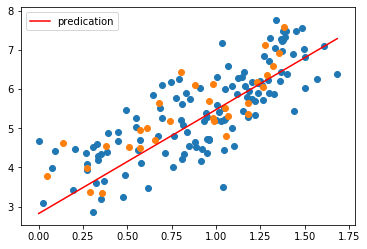

Train cost: 0.542
Test cost: 0.426


In [7]:
x = np.linspace(train_x.min(), train_x.max(), train_x.size)
y = t0 + t1 * x
plt.plot(x, y, label='predication', color='red')
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.legend()
plt.show()
print(f'Train cost: {np.square(t0 + t1 * train_x - train_y).sum() / train_x.size:.3f}')
print(f'Test cost: {np.square(t0 + t1 * test_x - test_y).sum() / test_x.size:.3f}')